In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
train_df = pd.read_csv("./fashion_mnist/fashion-mnist_train.csv", dtype=np.uint8, nrows=10000)
test_df = pd.read_csv("./fashion_mnist/fashion-mnist_test.csv", dtype=np.uint8, nrows=2000)

# Preprocess
x_train = train_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_df["label"], 10)

x_test = test_df.drop("label", axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = to_categorical(test_df["label"], 10)

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.2888 - loss: 2.0362 - val_accuracy: 0.6355 - val_loss: 1.0057
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6211 - loss: 1.0458 - val_accuracy: 0.7490 - val_loss: 0.7261
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7060 - loss: 0.8039 - val_accuracy: 0.7570 - val_loss: 0.6228
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7492 - loss: 0.6851 - val_accuracy: 0.7795 - val_loss: 0.5771
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7703 - loss: 0.6277 - val_accuracy: 0.8025 - val_loss: 0.5340
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7815 - loss: 0.5898 - val_accuracy: 0.8135 - val_loss: 0.5064
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7934 - loss: 0.5538 - val_accuracy: 0.8225 - val_loss: 0.4947
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8102 - loss: 0.5165 - val_accuracy: 0.8255 - v

In [9]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.4322
Test Loss: 0.44
Test Accuracy: 0.83


In [10]:
pred_probs = model.predict(x_test)
predictions = np.argmax(pred_probs, axis=1)
actuals = np.argmax(y_test, axis=1)

for i in range(10):
    print(f"Sample {i+1}: Predicted = {predictions[i]}, Actual = {actuals[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sample 1: Predicted = 0, Actual = 0
Sample 2: Predicted = 1, Actual = 1
Sample 3: Predicted = 2, Actual = 2
Sample 4: Predicted = 6, Actual = 2
Sample 5: Predicted = 3, Actual = 3
Sample 6: Predicted = 6, Actual = 2
Sample 7: Predicted = 8, Actual = 8
Sample 8: Predicted = 6, Actual = 6
Sample 9: Predicted = 5, Actual = 5
Sample 10: Predicted = 0, Actual = 0


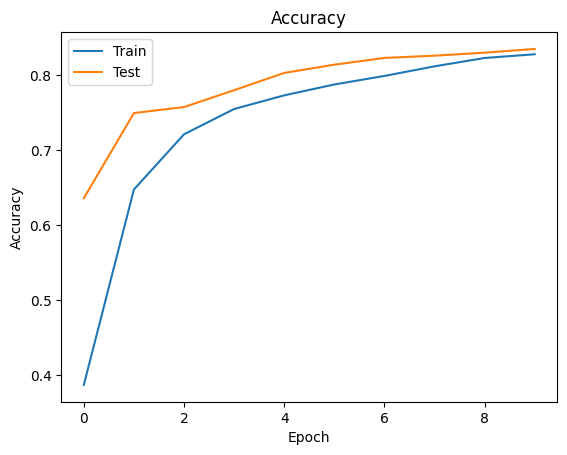

In [11]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Pullover


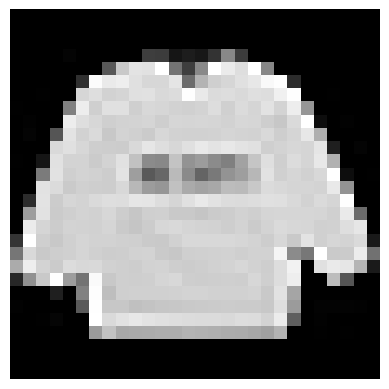

Ankle boot


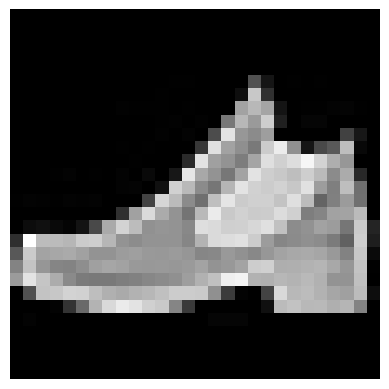

Shirt


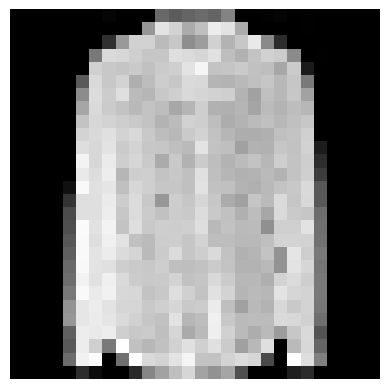

T-shirt/top


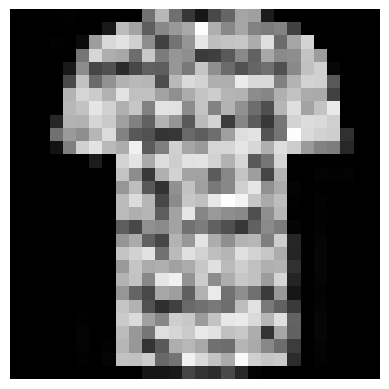

Dress


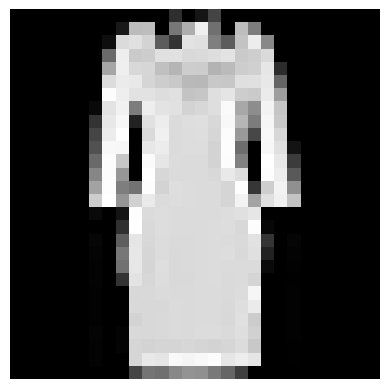

In [22]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(5):
    label_index = np.argmax(y_train[i])  # Convert one-hot to index
    print(labels[label_index])
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()